In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
retail = pd.read_csv('data/Online Retail.csv')
student = pd.read_csv('data/StudentsPerformance.csv')

# Dealing with missing values

## Finding where values are missing

In [3]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### In R

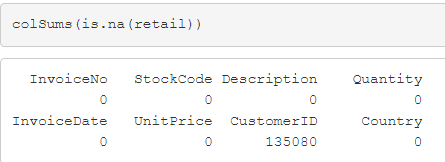

### Comparison with WEKA

Missing values must be replaced with ? before loading into WEKA. Then to find the number of missing values per attribute, each one must be clicked on in Explorer separately.

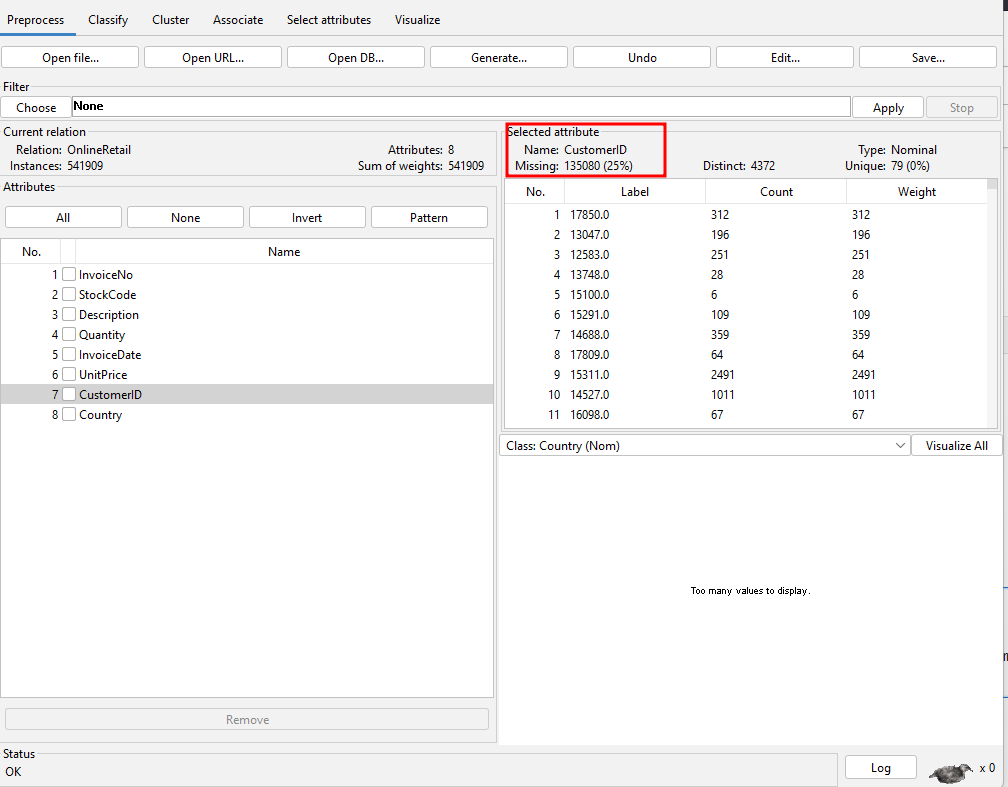

## Dropping records with missing values

In [4]:
retail = retail.dropna(subset=['CustomerID'])
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### In R

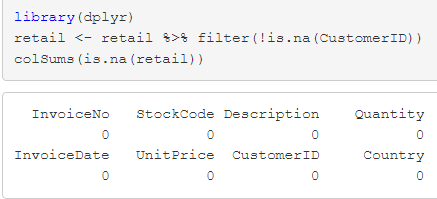

### Comparison with WEKA
There is in theory a way to do this. I was not able to make it work.

## Filling missing values 

in this case, where the price is 0, fill in the mean price for items with that stock code, rounded to 2 decimal places

In [5]:
print('No. of prices = 0.0 before filling = ' + str(len(retail[retail['UnitPrice'] == 0.0])))

# Calculate mean UnitPrice for each StockCode where UnitPrice is not 0
stock_mean_prices = retail[retail['UnitPrice'] > 0].groupby('StockCode')['UnitPrice'].mean().round(2)

# Safely fill UnitPrice of 0.0 with the mean price for that StockCode using .get()
# Use .loc to safely update the UnitPrice values
retail.loc[retail['UnitPrice'] == 0.0, 'UnitPrice'] = retail.apply(
    lambda row: stock_mean_prices.get(row['StockCode'], row['UnitPrice']),
    axis=1
)

print('No. of prices = 0.0 after filling = ' + str(len(retail[retail['UnitPrice'] == 0.0])))
print('The one left is due to a price of 0.001 rounding to 0.00')

No. of prices = 0.0 before filling = 40
No. of prices = 0.0 after filling = 1
The one left is due to a price of 0.001 rounding to 0.00


### In R

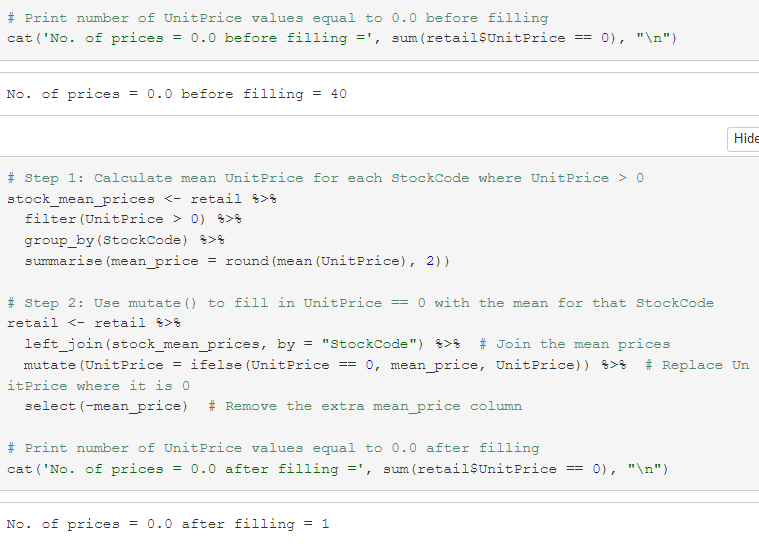

### Comparison with WEKA

This is not possible without using an external tool to get the means by StockCode

# Encoding Categorical Variables

In [6]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### In R

Some algorithms do not need categorical variables explicitly converted to numbers; instead, attributes can be labelled as factors, but some require the same conversions as Python.

#### Demonstration of Factors

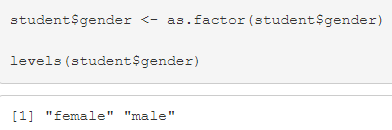

## one-hot encoding

In [7]:
student = pd.get_dummies(student, columns=['race/ethnicity'])
student.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,bachelor's degree,standard,none,72,72,74,False,True,False,False,False
1,female,some college,standard,completed,69,90,88,False,False,True,False,False
2,female,master's degree,standard,none,90,95,93,False,True,False,False,False
3,male,associate's degree,free/reduced,none,47,57,44,True,False,False,False,False
4,male,some college,standard,none,76,78,75,False,False,True,False,False


### In R

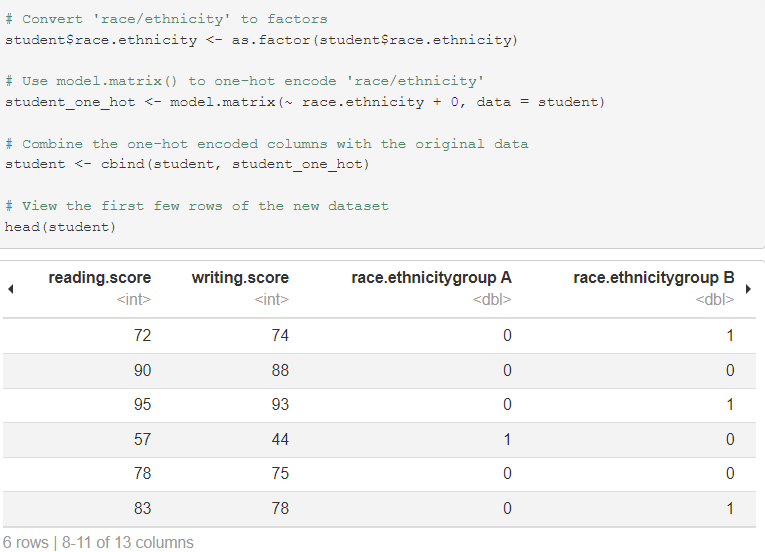

### Comparison with WEKA

Happens behind the scenes when modelling, but also possible using the NominalToBinary filter.

## Ordinal encoding

In [8]:
student['parental level of education'] = pd.Categorical(student['parental level of education'], 
                                                   categories=["some high school", 
                                                               "high school",
                                                               "some college",
                                                              "associate's degree",
                                                              "bachelor's degree",
                                                              "master's degree"], 
                                                   ordered=True)
student['parental level of education_code'] = student['parental level of education'].cat.codes
student.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_code
0,female,bachelor's degree,standard,none,72,72,74,False,True,False,False,False,4
1,female,some college,standard,completed,69,90,88,False,False,True,False,False,2
2,female,master's degree,standard,none,90,95,93,False,True,False,False,False,5
3,male,associate's degree,free/reduced,none,47,57,44,True,False,False,False,False,3
4,male,some college,standard,none,76,78,75,False,False,True,False,False,2


### In R

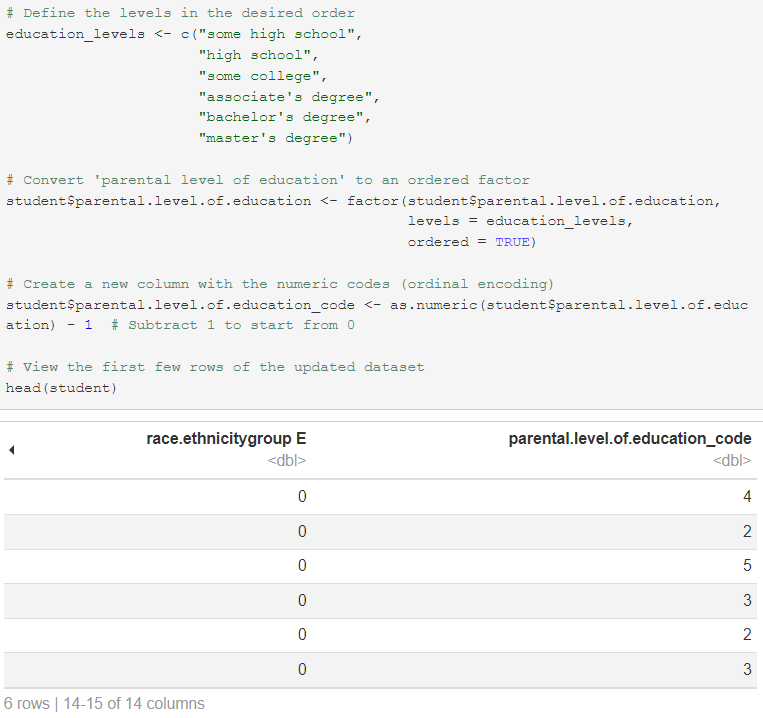

### Comparison with WEKA

WEKA does not have a specialist ordinal data category. It will convert nominal data to numeric behind the scenes when modelling. It looks like only one-hot encoding type is possible, using NominalToBinary filter.

# Binning numerical data

In [9]:
# Define bins and labels
bins = [0, 50, 75, 100]  # The boundaries for fail, pass, and distinction
labels = ['Fail', 'Pass', 'Distinction']

# Use pd.cut to bin the data
student['math_grade'] = pd.cut(student['math score'], bins=bins, labels=labels, include_lowest=True)

student.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_code,math_grade
0,female,bachelor's degree,standard,none,72,72,74,False,True,False,False,False,4,Pass
1,female,some college,standard,completed,69,90,88,False,False,True,False,False,2,Pass
2,female,master's degree,standard,none,90,95,93,False,True,False,False,False,5,Distinction
3,male,associate's degree,free/reduced,none,47,57,44,True,False,False,False,False,3,Fail
4,male,some college,standard,none,76,78,75,False,False,True,False,False,2,Distinction


### In R

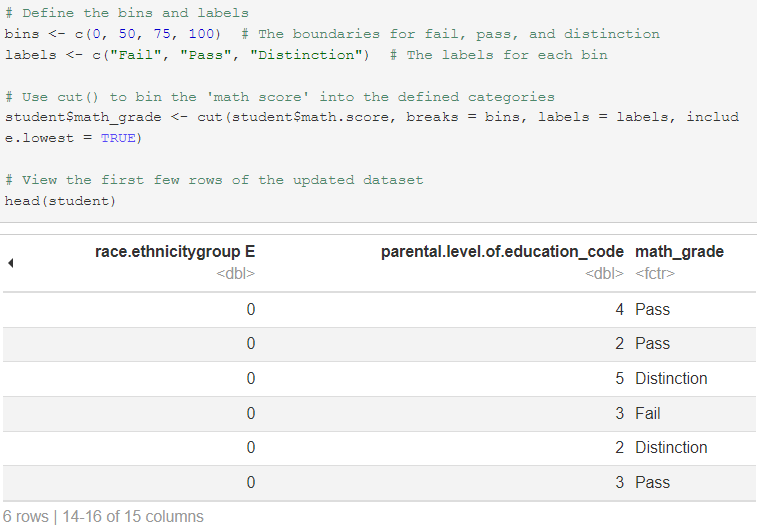

### Comparison with WEKA

This is possible with WEKA using the Discretize filter, however it was not possible to choose the edges of the bins or to apply labels to them. Choosing edges may require more knowledge of the tool, but labels are apparently not possible at all.

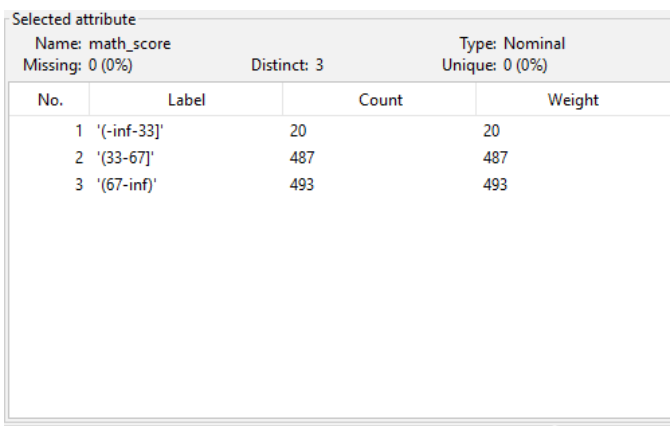

# Handle Outliers

In [10]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


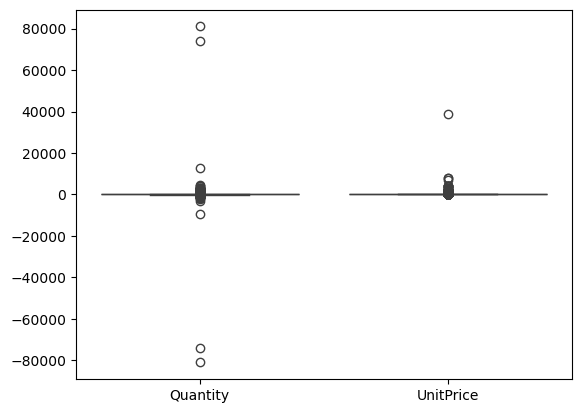

In [11]:
num_cols = ['Quantity', 'UnitPrice']
retail_num = retail[num_cols]

sns.boxplot(data=retail_num)
plt.show()

### In R

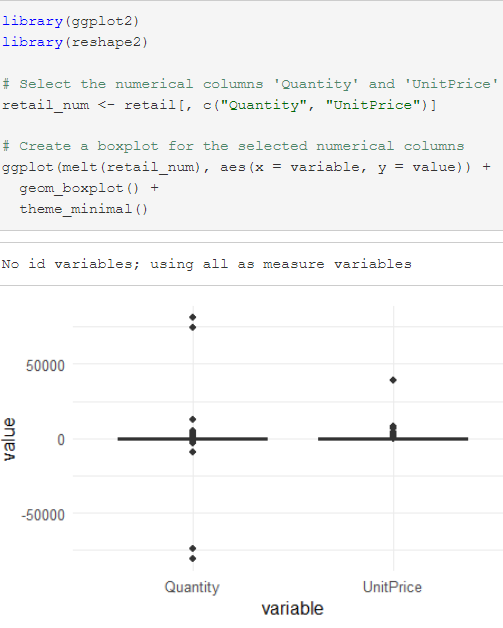

### Comparison with WEKA

It is not possible to draw boxplots to check for outliers in WEKA. Outliers have to be found manually or using other tools.

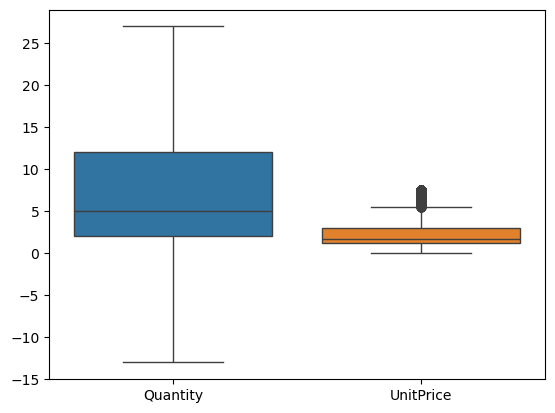

In [12]:
# Function to remove outliers using IQR
def remove_outliers(df, col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return filtered_df

# Remove outliers from both numerical columns
retail = remove_outliers(retail, 'Quantity')
retail = remove_outliers(retail, 'UnitPrice')

retail_num = retail[num_cols]

sns.boxplot(data=retail_num)
plt.show()

### In R

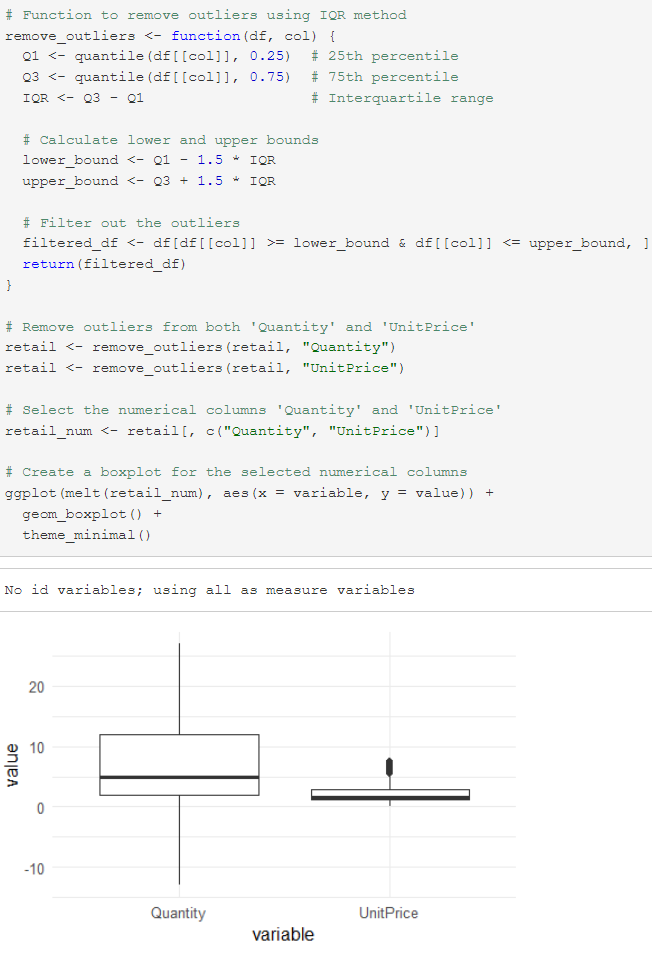

### Comparison with WEKA

This is not possible with WEKA. While it is possible to remove values outside a certain range using the RemoveWithValues filter, the IQR would have to be calculated using external tools such as python.

# Scaling and Normalising Data

In [13]:
retail_num.describe()

,Quantity,UnitPrice
count,344380.000000,344380.000000
mean,7.280002,2.201459
std,6.880850,1.548393
min,-13.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.650000
75%,12.000000,2.950000
max,27.000000,7.500000


### In R

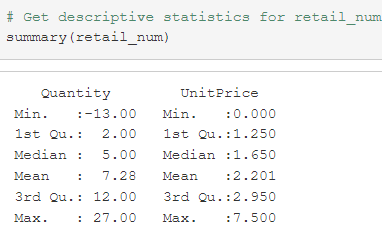

In [14]:
scaler = StandardScaler()
scaled_retail_num = pd.DataFrame(scaler.fit_transform(retail_num), columns=retail_num.columns)

scaled_retail_num.describe()

,Quantity,UnitPrice
count,3.443800e+05,3.443800e+05
mean,5.226217e-17,1.259822e-16
std,1.000001e+00,1.000001e+00
min,-2.947315e+00,-1.421772e+00
25%,-7.673485e-01,-6.144825e-01
50%,-3.313552e-01,-3.561498e-01
75%,6.859626e-01,4.834317e-01
max,2.865929e+00,3.421967e+00


### In R

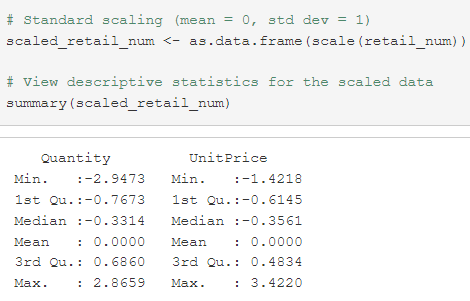

### Comparison with WEKA

Possible using Standardize filter

In [15]:
normalizer = Normalizer(norm='l2')
normed_retail_num = pd.DataFrame(normalizer.fit_transform(retail_num), columns=retail_num.columns)

normed_retail_num.describe()

,Quantity,UnitPrice
count,344380.000000,344380.000000
mean,0.781115,0.433725
std,0.307898,0.327018
min,-0.999950,0.000000
25%,0.628520,0.123220
50%,0.921982,0.384615
75%,0.992278,0.747409
max,1.000000,0.991228


### In R

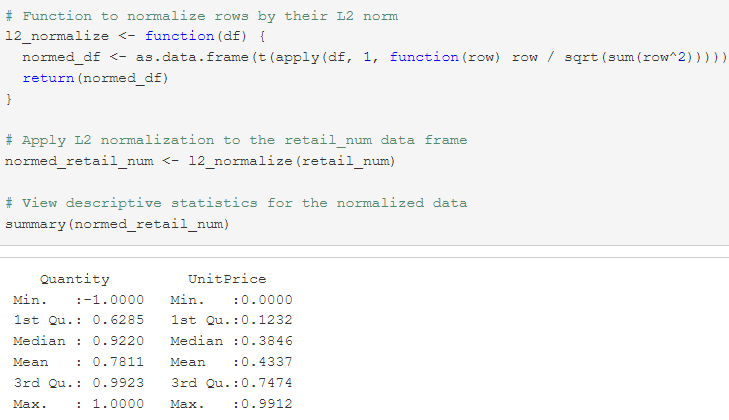

### Comparison with WEKA

Possible using Normalize filter